<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%5B8%5D%EC%82%AC%EC%A3%BC_%EC%A7%81%EC%97%85%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 태어난 월, 일, 시로 직업을 예측하여 보자

# 사주로 직업을 예측하기 위해서는 어떤 데이터와 모형이 필요할까?

---

어떤 복잡한 형태로던지(whatever the patter is) 사주가 직업에 영향을 준다면, 학습 가능할 것이다. 
---

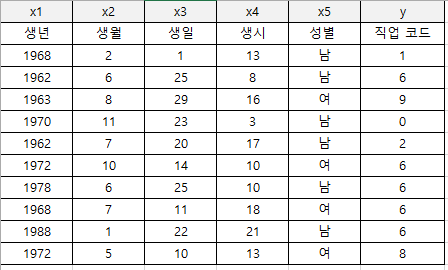

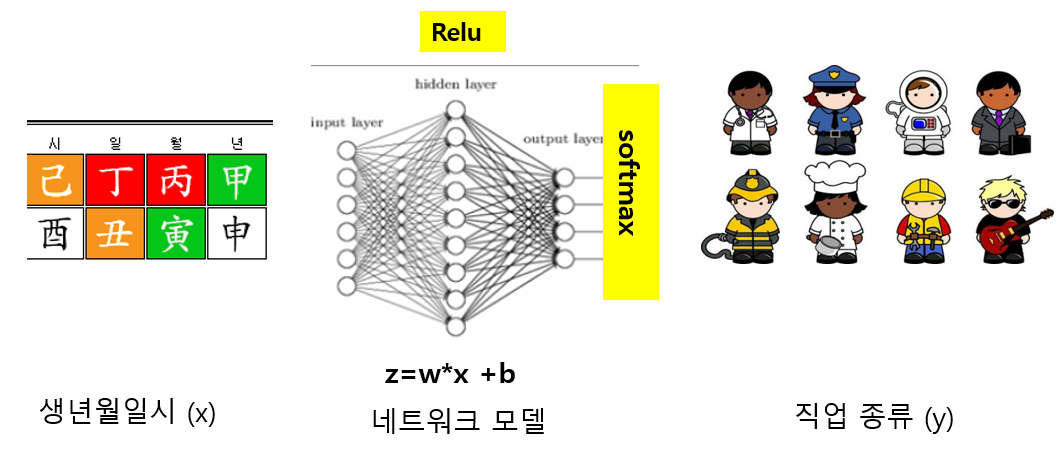

# 연습 데이터 불러오기

In [1]:

## 필요한 라이브러리 불러오기
import pandas as pd; import numpy as np; from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical;  from matplotlib import style

## 1. 데이터 불러오기  
!git clone https://github.com/hongjai-rhee/public.git
## 깃허브 디렉토리 마운트

dat = pd.read_csv('/content/public/sajoo.csv')

class_names = ['무직', '정치가', '공무원', '사업가', '운동선수', '연예인', '의사' ,'회사원']    ## 직업 이름
class_code=['none', 'politics', 'public', 'CEO', 'sports', 'entertainer', 'doctor', 'company man']
dat.head()

Using TensorFlow backend.


Cloning into 'public'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 512 (delta 71), reused 63 (delta 20), pack-reused 353
Receiving objects: 100% (512/512), 51.97 MiB | 11.82 MiB/s, done.
Resolving deltas: 100% (249/249), done.


,month,day,time,job
0,12,11,13,0
1,11,11,18,0
2,8,19,5,1
3,2,31,21,8
4,11,17,9,0


# 사주와 직업간에 어떤 패턴을 볼수 있는가? 놀랍게도 학습을 마치면, 패턴을 알아낸다.

# 분류 문제의 y는 원핫 코드로 변환

In [2]:
dat = np.array(dat); ncol=dat.shape[1]; nrow=dat.shape[0]
x=dat[:,0:ncol-1]; y=dat[:,ncol-1]-1  #0=의사, 1=교육, 2=정치, 3=공무원, 4=사업, 5=회사원, 6=연예인, 7=운동선수, 8=무직
y = to_categorical(y)
 
print('x=')
print("생년 생월 생시")
print(np.around(x[0:10,:],2))     
print()
print('y=')
print("직업 원핫 코드")
print(y[0:10])                     # 직업 코드


x=
생년 생월 생시
[[12 11 13]
 [11 11 18]
 [ 8 19  5]
 [ 2 31 21]
 [11 17  9]
 [ 5 30 13]
 [ 5 21 21]
 [ 8 28 10]
 [12 26  9]
 [10  3 12]]

y=
직업 원핫 코드
[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


# 학습 파라미터 설정

In [0]:
hidden_neuron=20      ## 은닉층(1개)의 뉴론 수 (은닉층 없으면 0으로 설정)
EPOCH=300; BATCH=32  ## 학습횟수 
test = 0.2           ## 데이터 중 테스트셋의 비율 


# 학습 시작






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 800 samples, validate on 200 samples
Epoch 1/300





 - 1s - loss: 7.0264 - acc: 0.0425 - val_loss: 5.4400 - val_acc: 0.1000
Epoch 2/300
 - 0s - loss: 4.5672 - acc: 0.1525 - val_loss: 3.8690 - val_acc: 0.1250
Epoch 3/300
 - 0s - loss: 3.3174 - acc: 0.1600 - val_loss: 2.8337 - val_acc: 0.2000
Epoch 4/300
 - 0s - loss: 2.4303 - acc: 0.2188 - val_loss: 2.0953 - val_acc: 0.2750
Epoch 5/300
 - 0s - loss: 1.9138 - acc: 0.3187 - val_loss: 1.6962 - val_acc: 0.4150
Epoch 6/300
 - 0s - loss: 1.6753 - acc: 0.4275 - val_loss: 1.5396 - val_acc: 0.5050
Epoch 7/300
 - 0s - loss: 1.5616 - acc: 0.4838 - val_loss: 1.4666 - val_acc: 0.5550
Epoch 8/300
 - 0s - loss: 1.5026 - acc: 0.5100 - val_loss: 1.4133 - val_acc: 0.5350
Epoch 9/300
 - 0s - loss: 1.4615 - acc: 0.4900 - val_loss: 1.3841 - val_acc: 0.5250
Epoch 10/300
 - 0s - loss: 1.4305 - acc: 0.4913 - val_loss: 1.3595 - val_acc: 0.5300
Epoch 

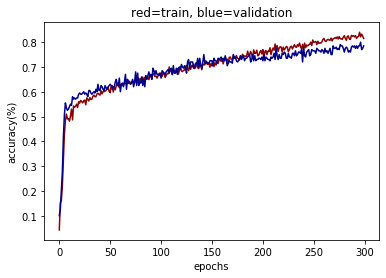

In [4]:
#### 이 아래는 자동으로 실행됨
## 2. 학습/검증 데이터 나누기  (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test, random_state=77)

## 3. 모델만들기
if hidden_neuron ==0: 
    model = Sequential()
    model.add(Dense(y_train.shape[1], input_dim=x_train.shape[1], activation='softmax'))## 은닉층=0
else: 
    model = Sequential()
    model.add(Dense(hidden_neuron, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax')) ## 은닉층=1

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs = EPOCH, batch_size=BATCH, validation_data=(x_test, y_test), verbose = 2)
model.summary()

# model fit 그림으로 표시
plt.plot(range(EPOCH), hist.history['acc'], label='Accuracy', color='darkred')
plt.plot(range(EPOCH), hist.history['val_acc'], label='Validation Accuracy', color='darkblue')
plt.xlabel('epochs'); plt.ylabel('accuracy(%)'); plt.title('red=train, blue=validation'); plt.show()


# 학습된 모형을 사용하여 직업을 예측해보자.

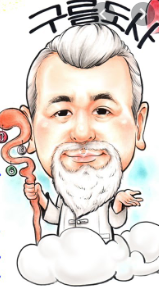

저의 사주는 1 월 4 일 15 시 입니다
=================> 당신의 직업은 99.52 %의 확률로 회사원 이 될 것으로 예측됩니다



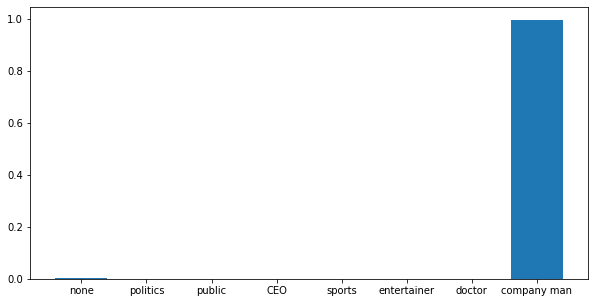

In [7]:

class color:  ## 컬러 코드
   PURPLE = '\033[95m';CYAN = '\033[96m'; DARKCYAN = '\033[36m'; BLUE = '\033[94m';GREEN = '\033[92m'; YELLOW = '\033[93m'; RED = '\033[91m'; BOLD = '\033[1m'; UNDERLINE = '\033[4m'; END = '\033[0m'
#print(color.RED + 'Hello World !' + color.END)

x_new= x_test; x_new; yhat = model.predict(x_new)
y_pred=np.argmax(yhat,axis=1)
from random import *
i = randint(1, 150)  # 1부터 100 사이의 임의의 정수

print('저의 사주는', x_test[i,0], "월", x_test[i,1], "일", x_test[i,2], "시 입니다")
print("=================> 당신의 직업은", np.round(100*yhat[i,y_pred[i]],2), "%의 확률로", color.RED + class_names[y_pred[i]] + color.END, "이 될 것으로 예측됩니다")
print()

plt.figure(figsize=(10,5))
plt.bar(class_code,yhat[i])
plt.show()
